In [1]:
import numpy as np

# Initialization

In [2]:
# 5 bandits
q = [2.5, -3.5, 1.0, 5.0, -2.5] # actual mean of distribution
std = [0.33, 1.0, 0.66, 1.98, 1.65] # actual standard deviation of distribution

# Setting up the enviroment

In [3]:
from environment import bandit_env # upload environment.py

In [4]:
bandits = bandit_env(q, std)

In [5]:
bandits.r_mean

[2.5, -3.5, 1.0, 5.0, -2.5]

In [6]:
bandits.r_stddev

[0.33, 1.0, 0.66, 1.98, 1.65]

In [7]:
bandits.n

5

In [8]:
def argmax(reward):
    max_reward = reward[0]
    ties = [0]

    for idx, i in enumerate(reward[1:]):
        if i > max_reward:
            max_reward = i
            ties = [idx+1]
        if i == max_reward:
            ties.append(idx+1)
    
    if len(ties) > 1:
        index_of_max = np.random.choice(ties)
    else:
        index_of_max = ties[0]
    
    return index_of_max


In [9]:
cnts = [0]*5
rewards = [0, 0, 0, 0, 0]
for i in range(1000):
    cnts[argmax(rewards)] += 1
cnts

[201, 192, 212, 189, 206]

# Epsilon greedy

In [10]:
def epsilon_greedy(rewards, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(5)
    else:
        return argmax(rewards)

In [11]:
rewards = np.zeros(5)
epsilons = np.array([1/128, 1/64, 1/32, 1/16, 1/8, 1/4])
avg_reward = []

for e in epsilons:  
    rewards = np.zeros(5)

    for i in range(1000):
        action = epsilon_greedy(rewards, e)
        rewards[action] += bandits.pull(action)
    rewards = rewards/1000
    # print(np.sum(rewards))

    avg_reward.append(np.sum(rewards)/len(rewards))
    # print(avg_reward)

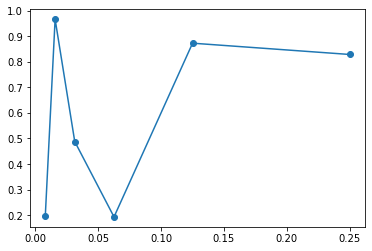

[0.19690650363393888,
 0.965920161411872,
 0.4876150414231296,
 0.19284076775127518,
 0.8722784660663274,
 0.8281561748304178]

In [12]:
import matplotlib.pyplot as plt
plt.scatter(epsilons ,avg_reward)
plt.plot(epsilons, avg_reward)
plt.show()
avg_reward